<a href="https://colab.research.google.com/github/Dukhkasht/ML-and-DL-prjects/blob/main/image_ANNclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count(),torch.cuda.get_device_name()

(1, 'Tesla T4')

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

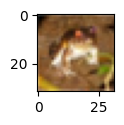

In [ ]:
plt.figure(figsize=(4,1))
plt.imshow(X_train[0])

In [ ]:
#scaling the images by dividing it with 255 as each picture has 255 arrays
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
# one hot encoding for all 10 output classes of y_train and y_test
y_train_categorical =  keras.utils.to_categorical(
    y_train, num_classes = 10)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10)

In [ ]:
# creating the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
#we used categorical crossentropy for loss as it is more often used for one hot encoded and
#sparse categorical crossentropy is used for the discrete output variables(1,2,3,etc.)

model.fit(X_train_scaled,y_train_categorical,epochs = 50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3022 - loss: 1.9343
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4177 - loss: 1.6423
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4480 - loss: 1.5601
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4763 - loss: 1.4874
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4920 - loss: 1.4362
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5101 - loss: 1.3912
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5215 - loss: 1.3571
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5387 - loss: 1.3179
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5536 - loss: 1.2758
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5616 - loss: 1.2492
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5741 - loss: 1.2253
Epoch 12/50
1563/1563 ━━━━━━━━

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


3

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5673 - loss: 1.5688


[1.5793589353561401, 0.5636000037193298]

In [ ]:
y_predicted = model.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

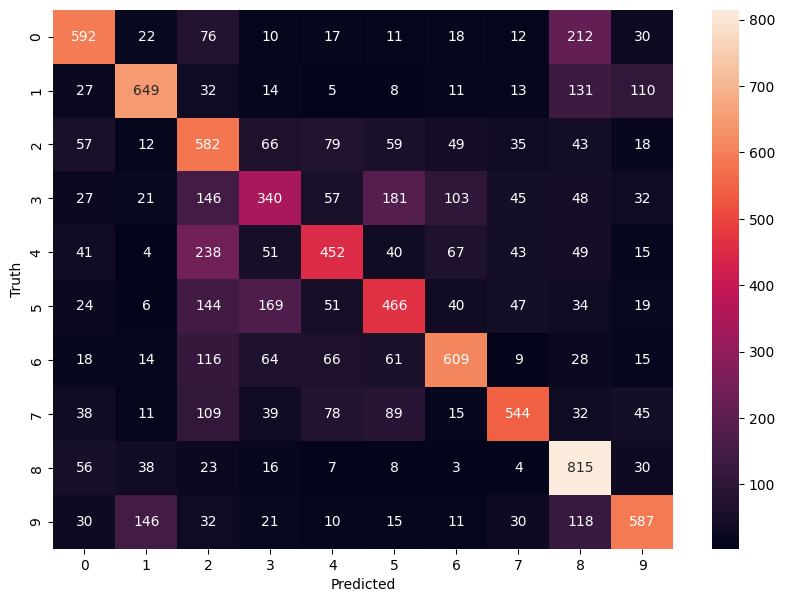

In [ ]:
#creating a confustion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')